# Purity Computation and validation Plots
---

## Definition of Purity

The definition purity is: "The number of correct-matched top divided by the total number"(in events or entries.)<br/><br/>
We can define two types of putiry:<br/>

1. $P_{top}$: This is a purity base on the number of entries.<br/>

    $P_{top} = \frac{2*N_{both correct} + N_{one correct}}{N_{both correct} + N_{one correct} + N_{Neither correct}}$

2. $P_{event}$:  This is a purity base on the number of events.<br/>

    $P_{event} = \frac{N_{both correct}}{N_{both correct} + N_{one correct} + N_{Neither correct}}$

## Definition of "Correct"

Assume we have 2 candidates top pair obtained from chi2 reconstruction. We can compare this 2 candidates with the truth matching data(obtained from $\Delta$R matching). 
<br/>
For example, <br/> 
If we have a set of truth matching result.<br/>
Truth matching result: Candidate 1: (0, 1, 4), Candidate 2: (5, 3, 2)<br/>
<br/>
We called a candidates obtained from chi2 reconstruction "correct" if Chi2 candidate: (0, 1, 4)<br/>
We called a candidates obtained from chi2 reconstruction "incorrect" if Chi2 candidate: (0, 3, 2) (The quarks are tagged to the wrong candidate) <br/>
We called a candidates obtained from chi2 reconstruction "non-match" if Chi2 candidate: (0, 1, 7) (A wrong quark appears in the candidate) <br/>

<br/>
In the definition upon, we will have 9 possibilities. <br/>
For the convenience, we seperate them into 4 cases:

1. Case 1: Both correct.
2. Case 2: 1 correct + 1 incorrect.
3. Case 3: Neither correct.
4. Case 4: 1 or 2 NOn-matched candidate exist.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import h5py, tqdm
from utilize import delta_R, deltaPhi

In [2]:
N_match_top_in_event_chi2 = []
jet_parton_index_chi2 = []
parton_jet_index_chi2 = []
jet_parton_index_del = []
parton_jet_index_del = []
jet_pt_chi2 = []
jet_phi_chi2 = []
jet_eta_chi2 = []
jet_barcode_chi2 = []
jet_mass_chi2 = []
jet_btag_chi2 = []
chi2_value = []
parton_pt_chi2 = []
parton_phi_chi2 = []
parton_eta_chi2 = []
parton_mass_chi2 = []

N_match_top_in_event_del = []
jet_parton_index_del = []
parton_jet_index_del = []
jet_pt_del = []
jet_phi_del = []
jet_eta_del = []
jet_barcode_del = []
jet_mass_del = []
jet_btag_del = []
parton_pt_del = []
parton_phi_del = []
parton_eta_del = []
parton_mass_del = []


In [3]:
for i in tqdm.trange(1,11):
    PREFIX_chi2 = "./output/output_chi2/"
    chi2_file = ""
    seq_chi2 = (PREFIX_chi2, "output_", "chi2_", str(i), ".h5")

    with h5py.File(chi2_file.join(seq_chi2), 'r') as f:
        for a, b, c, d, e, g, h, j, k, l, m, n, o, s in zip(f['N_match_top_in_event'], f['jet_pt'], f['jet_eta'], f['jet_phi'], f['jet_mass'], f['jet_btag'], 
            f['jet_barcode'], f['parton_pt'], f['parton_eta'], f['parton_phi'], f['parton_mass'], f['jet_parton_index'], f['parton_jet_index'], f['CHi2_value']):

            N_match_top_in_event_chi2.append(a)
            jet_pt_chi2.append(b)
            jet_eta_chi2.append(c)
            jet_phi_chi2.append(d)
            jet_mass_chi2.append(e)
            jet_btag_chi2.append(g)            
            jet_barcode_chi2.append(h)
            parton_pt_chi2.append(j)
            parton_eta_chi2.append(k)
            parton_phi_chi2.append(l)
            parton_mass_chi2.append(m)
            jet_parton_index_chi2.append(n)
            parton_jet_index_chi2.append(o)
            chi2_value.append(s)
 


100%|██████████| 10/10 [03:27<00:00, 20.75s/it]


In [4]:
for i in tqdm.trange(1,11):
    PREFIX_del = "./output/output_delta/"
    delta_file = ""
    seq_delta = (PREFIX_del, "output_", "del_", str(i), ".h5")
    with h5py.File(delta_file.join(seq_delta), 'r') as g:
        for a, b, c, d, e, f, h, j, k, l, m, n, o in zip(g['N_match_top_in_event'], g['jet_pt'], g['jet_eta'], g['jet_phi'], g['jet_mass'], g['jet_btag'], g['jet_barcode'], g['parton_pt'], g['parton_eta'], g['parton_phi'], g['parton_mass'], g['jet_parton_index'], g['parton_jet_index']):

            N_match_top_in_event_del.append(a)
            jet_pt_del.append(b)
            jet_eta_del.append(c)
            jet_phi_del.append(d)
            jet_mass_del.append(e)
            jet_btag_del.append(f)            
            jet_barcode_del.append(h)
            parton_pt_del.append(j)
            parton_eta_del.append(k)
            parton_phi_del.append(l)
            parton_mass_del.append(m)
            jet_parton_index_del.append(n)
            parton_jet_index_del.append(o)

100%|██████████| 10/10 [03:14<00:00, 19.41s/it]


In [5]:
correct_1_chi2 = np.zeros(len(jet_pt_chi2))
correct_2_chi2 = np.zeros(len(jet_pt_chi2))
non_matched_chi2_1 = np.zeros(len(jet_pt_chi2))
non_matched_chi2_2 = np.zeros(len(jet_pt_chi2))
case = np.zeros(len(jet_pt_chi2))
pair_info_chi2 = []
pair_info_del = []
for i in range(len(case)):
    case[i] = 99999

In [6]:
# case 1 : both correct 
# case 2 : 1 correct + 1 incorrect
# case 3 : both incorrect (but not non-matched)
# case 4 : correct/incorrect/non-matched + non-matched 

for i in tqdm.trange(len(jet_parton_index_del)):
    deltaR_vector = jet_parton_index_del[i]
    chi2_vector = jet_parton_index_chi2[i]

    b_1_del, b_2_del, q_1_del, q_2_del, q_3_del, q_4_del = 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'
    b_1_chi2, b_2_chi2, q_1_chi2, q_2_chi2, q_3_chi2, q_4_chi2 = 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'
    for j in range(len(deltaR_vector)):
        

        if deltaR_vector[j] == 0:
            b_1_del = j
        else : pass

        if deltaR_vector[j] == 1:
            q_1_del = j
        else : pass

        if deltaR_vector[j] == 2:
            q_2_del = j
        else : pass

        if deltaR_vector[j] == 3:
            b_2_del = j
        else : pass

        if deltaR_vector[j] == 4:
            q_3_del = j
        else : pass

        if deltaR_vector[j] == 5:
            q_4_del = j
        else : pass

        if chi2_vector[j] == 0:
            b_1_chi2 = j
        else : pass

        if chi2_vector[j] == 1:
            q_1_chi2 = j
        else : pass

        if chi2_vector[j] == 2:
            q_2_chi2 = j
        else : pass

        if chi2_vector[j] == 3:
            b_2_chi2 = j
        else : pass

        if chi2_vector[j] == 4:
            q_3_chi2 = j
        else : pass

        if chi2_vector[j] == 5:
            q_4_chi2 = j
        else : pass

    if np.isnan(b_1_chi2) == False or np.isnan(q_1_chi2) == False or np.isnan(q_2_chi2) == False:
        if np.isnan(b_2_chi2) == False or np.isnan(q_3_chi2) == False or np.isnan(q_4_chi2) == False:
            if b_1_chi2 == b_1_del and ( (q_1_chi2 == q_1_del and q_2_chi2 == q_2_del) or ( q_1_chi2 == q_2_del and q_2_chi2 == q_1_del) ):
                correct_1_chi2[i] = 1
            elif b_1_chi2 == b_1_del and ( ((q_1_chi2 == q_1_del and q_2_chi2 != q_2_del) or (q_1_chi2 != q_1_del and q_2_chi2 == q_2_del)) 
                    or ((q_1_chi2 == q_2_del and q_2_chi2 != q_1_del) or (q_1_chi2 != q_2_del and q_2_chi2 == q_1_del)) 
                    or ((q_1_chi2 != q_1_del and q_2_chi2 != q_2_del) or (q_1_chi2 != q_2_del and q_2_chi2 != q_1_del)) ):
                non_matched_chi2_1[i] = 1
            else : pass

            if b_2_chi2 == b_2_del and ( (q_3_chi2 == q_3_del and q_4_chi2 == q_4_del) or ( q_3_chi2 == q_4_del and q_4_chi2 == q_3_del )):
                correct_2_chi2[i] = 1
            elif b_2_chi2 == b_2_del and ( ((q_3_chi2 == q_3_del and q_4_chi2 != q_4_del) or (q_3_chi2 != q_3_del and q_4_chi2 != q_4_del)) 
                    or ((q_3_chi2 == q_4_del and q_4_chi2 != q_3_del) or (q_3_chi2 != q_4_del and q_4_chi2 != q_3_del)) 
                    or ((q_3_chi2 != q_3_del and q_4_chi2 != q_4_del) or (q_3_chi2 != q_4_del and q_4_chi2 != q_3_del)) ):
                non_matched_chi2_2[i] = 1
            else: pass 

            if b_1_chi2 == b_2_del and ( (q_1_chi2 == q_3_del and q_2_chi2 == q_4_del) or (q_1_chi2 == q_4_del and q_2_chi2 == q_3_del) ):
                correct_1_chi2[i] = 1
            elif b_1_chi2 == b_2_del and ( ( (q_1_chi2 == q_3_del and q_2_chi2 != q_4_del)  or (q_1_chi2 != q_3_del and q_2_chi2 == q_4_del) ) 
                    or ( (q_1_chi2 == q_4_del and q_2_chi2 != q_3_del)  or (q_1_chi2 != q_4_del and q_2_chi2 == q_3_del) ) ):
                non_matched_chi2_1[i] = 1
            else : pass 

            if b_2_chi2 == b_1_del and ( (q_3_chi2 == q_1_del and q_4_chi2 == q_2_del) or (q_3_chi2 == q_2_del and q_4_chi2 == q_1_del) ):
                correct_2_chi2[i] = 1 
            elif b_2_chi2 == b_1_del and ( ( (q_3_chi2 == q_1_del and q_4_chi2 != q_2_del)  or (q_3_chi2 != q_1_del and q_4_chi2 == q_2_del) )
                    or ( (q_3_chi2 == q_2_del and q_4_chi2 != q_1_del)  or (q_3_chi2 != q_2_del and q_4_chi2 == q_1_del) ) ):
                non_matched_chi2_2[i] = 1
            else : pass

            if (b_1_chi2 != b_1_del and b_1_chi2 != b_2_del):
                non_matched_chi2_1[i] = 1
            
            if (b_2_chi2 != b_2_del and b_2_chi2 != b_1_del):
                non_matched_chi2_2[i] = 1
            
            if (b_1_chi2 == b_1_del and b_2_chi2 == b_2_del):
                if ( (q_1_chi2 == q_3_del and q_2_chi2 == q_4_del) or  (q_1_chi2 == q_4_del and q_2_chi2 == q_3_del)):
                    correct_1_chi2[i] = 0
                elif ((q_3_chi2 == q_1_del and q_4_chi2 == q_2_del) or (q_3_chi2 == q_2_del and q_4_chi2 == q_1_del)):
                    correct_2_chi2[i] = 0
                else: pass
            elif (b_1_chi2 == b_2_del and b_2_chi2 == b_1_del):
                if ( (q_1_chi2 == q_1_del and q_2_chi2 == q_2_del) or  (q_1_chi2 == q_2_del and q_2_chi2 == q_1_del)):
                    correct_1_chi2[i] = 0
                elif ((q_3_chi2 == q_3_del and q_4_chi2 == q_4_del) or (q_3_chi2 == q_4_del and q_4_chi2 == q_3_del)):
                    correct_2_chi2[i] = 0
                else: pass
        else:   
            non_matched_chi2_2[i] = 1
            correct_2_chi2[i] = 0
        
        if b_1_chi2 == b_1_del and ( (q_1_chi2 == q_1_del and q_2_chi2 == q_2_del) or ( q_1_chi2 == q_2_del and q_2_chi2 == q_1_del) ):
                correct_1_chi2[i] = 1
        elif b_1_chi2 == b_1_del and ( ((q_1_chi2 == q_1_del and q_2_chi2 != q_2_del) or (q_1_chi2 != q_1_del and q_2_chi2 == q_2_del)) 
                    or ((q_1_chi2 == q_2_del and q_2_chi2 != q_1_del) or (q_1_chi2 != q_2_del and q_2_chi2 == q_1_del)) 
                    or ((q_1_chi2 != q_1_del and q_2_chi2 != q_2_del) or (q_1_chi2 != q_2_del and q_2_chi2 != q_1_del)) ):
                non_matched_chi2_1[i] = 1
        else : pass

        if b_1_chi2 == b_2_del and ( (q_1_chi2 == q_3_del and q_2_chi2 == q_4_del) or (q_1_chi2 == q_4_del and q_2_chi2 == q_3_del) ):
                correct_1_chi2[i] = 1 
        elif b_1_chi2 == b_2_del and ( ( (q_1_chi2 == q_3_del and q_2_chi2 != q_4_del)  or (q_1_chi2 != q_3_del and q_2_chi2 == q_4_del) ) 
                    or ( (q_1_chi2 == q_4_del and q_2_chi2 != q_3_del)  or (q_1_chi2 != q_4_del and q_2_chi2 == q_3_del) ) ):
                non_matched_chi2_1[i] = 1
        else : pass 
        
        if (b_1_chi2 != b_1_del and b_1_chi2 != b_2_del):
                non_matched_chi2_1[i] = 1

        cand_1 = set([b_1_chi2, q_1_chi2, q_2_chi2])
        cand_2 = set([b_2_chi2, q_3_chi2, q_4_chi2])
        del_1 = set([b_1_del, q_1_del, q_2_del])
        del_2 = set([b_2_del, q_3_del, q_4_del])

        if bool(del_1.symmetric_difference(cand_1)) == False:
            if non_matched_chi2_1[i] == 1:
                non_matched_chi2_1[i] = 0
            else : 
                pass
        elif bool(del_1.symmetric_difference(cand_2)) == False:
            if non_matched_chi2_2[i] == 1:
                non_matched_chi2_2[i] = 0
            else : 
                pass
        else : pass 

        if bool(del_2.symmetric_difference(cand_2)) == False:
            if non_matched_chi2_2[i] == 1:
                non_matched_chi2_2[i] = 0
            else : 
                pass
        elif bool(del_2.symmetric_difference(cand_1)) == False:
            if non_matched_chi2_1[i] == 1:
                non_matched_chi2_1[i] = 0
            else :
                pass
        else : pass 

    else:
        non_matched_chi2_1[i] = 1
        
    
    if correct_1_chi2[i] == 1 and correct_2_chi2[i] == 1 and non_matched_chi2_1[i] == 0 and non_matched_chi2_2[i] == 0:
        case[i] = 1
    elif  ( ( correct_1_chi2[i] == 1 and correct_2_chi2[i] == 0) or ( correct_1_chi2[i] == 0 and correct_2_chi2[i] == 1) ) and (non_matched_chi2_1[i] == 0 and non_matched_chi2_2[i] == 0) :
        case[i] = 2
    elif ( ( correct_1_chi2[i] == 0 and correct_2_chi2[i] == 0) and (non_matched_chi2_1[i] == 0 and non_matched_chi2_2[i] == 0) ):
        case[i] = 3
    elif (non_matched_chi2_1[i] == 1 or non_matched_chi2_2[i] == 1):
        case[i] = 4
    else:
        print("error occur!")
    
    pair_del = [b_1_del, q_1_del, q_2_del, b_2_del, q_3_del, q_4_del]
    pair_chi2 = [b_1_chi2,  q_1_chi2, q_2_chi2, b_2_chi2, q_3_chi2, q_4_chi2]
    pair_info_del.append(pair_del)
    pair_info_chi2.append(pair_chi2)
    # print("\n")
    # print(pair_del, pair_chi2,"\n", correct_1_chi2[i], correct_2_chi2[i], non_matched_chi2_1[i], non_matched_chi2_2[i], case[i])

100%|██████████| 182014/182014 [00:33<00:00, 5421.25it/s]


In [7]:
print(np.sum(case == 1), np.sum(case == 2), np.sum(case == 3), np.sum(case == 4))

22898 5027 12666 141423


In [8]:
purity_event = np.sum(case == 1)/ (np.sum(case == 1) + np.sum(case == 2) + np.sum(case == 3))
purity_event

0.5641151979502845

In [9]:
purity_top = (2*np.sum(case == 1) + np.sum(case == 2))/ (2* (np.sum(case == 1) + np.sum(case == 2) + np.sum(case == 3)))
purity_top

0.6260377916286861

In [10]:
class four_vector():
    def __init__(self, idx1, idx2):
        self.pt = jet_pt_chi2[idx1][idx2]
        self.eta = jet_eta_chi2[idx1][idx2]
        self.phi = jet_phi_chi2[idx1][idx2]
        self.mass = jet_mass_chi2[idx1][idx2]
        self.px = self.pt * np.cos(self.phi)
        self.py = self.pt * np.sin(self.phi)
        self.pz = self.pt * np.sinh(self.eta)
        self.e = np.sqrt( (self.px**2 + self.py**2 + self.pz**2) + self.mass**2 )
        

In [11]:
mjj_case_1 = []
mjj_case_2 = []
mjj_case_3 = []
mjj_case_4 = []

mjjj_case_1 = []
mjjj_case_2 = []
mjjj_case_3 = []
mjjj_case_4 = []

def two_jet_inv(target1, target2):
    return np.sqrt( ( target1.e + target2.e )**2 - ( target1.px + target2.px )**2 - ( target1.py + target2.py )**2 - ( target1.pz + target2.pz )**2)

def three_jet_inv(target1, target2, target3):
    return np.sqrt( ( target1.e + target2.e + target3.e )**2 - ( target1.px + target2.px + target3.px )**2 - ( target1.py + target2.py + target3.py )**2 - ( target1.pz + target2.pz + target3.pz )**2)


for i in tqdm.trange(len(jet_parton_index_del)):
    b_1_chi2_idx = pair_info_chi2[i][0]
    q_1_chi2_idx = pair_info_chi2[i][1]
    q_2_chi2_idx = pair_info_chi2[i][2]
    b_2_chi2_idx = pair_info_chi2[i][3]
    q_3_chi2_idx = pair_info_chi2[i][4]
    q_4_chi2_idx = pair_info_chi2[i][5]

    tmp_b_1 = four_vector(i, b_1_chi2_idx)
    tmp_q_1 = four_vector(i, q_1_chi2_idx)
    tmp_q_2 = four_vector(i, q_2_chi2_idx)
    tmp_b_2 = four_vector(i, b_2_chi2_idx)
    tmp_q_3 = four_vector(i, q_3_chi2_idx)
    tmp_q_4 = four_vector(i, q_4_chi2_idx)

    tmp_mjj_1 = two_jet_inv(tmp_q_1, tmp_q_2)
    tmp_mjj_2 = two_jet_inv(tmp_q_3, tmp_q_4)

    tmp_mjjj_1 = three_jet_inv(tmp_b_1, tmp_q_1, tmp_q_2)
    tmp_mjjj_2 = three_jet_inv(tmp_b_2, tmp_q_3, tmp_q_4)

    if case[i] == 1:
        mjj_case_1.append(tmp_mjj_1)
        mjj_case_1.append(tmp_mjj_2)

        mjjj_case_1.append(tmp_mjjj_1)
        mjjj_case_1.append(tmp_mjjj_2)
    elif case[i] == 2:
        mjj_case_2.append(tmp_mjj_1)
        mjj_case_2.append(tmp_mjj_2)

        mjjj_case_2.append(tmp_mjjj_1)
        mjjj_case_2.append(tmp_mjjj_2)
    elif case[i] == 3:
        mjj_case_3.append(tmp_mjj_1)
        mjj_case_3.append(tmp_mjj_2)

        mjjj_case_3.append(tmp_mjjj_1)
        mjjj_case_3.append(tmp_mjjj_2)
    else:
        mjj_case_4.append(tmp_mjj_1)
        mjj_case_4.append(tmp_mjj_2)

        mjjj_case_4.append(tmp_mjjj_1)
        mjjj_case_4.append(tmp_mjjj_2)

5%|▌         | 9386/182014 [00:01<00:27, 6246.31it/s]/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in sqrt
  if sys.path[0] == '':
100%|██████████| 182014/182014 [00:28<00:00, 6335.70it/s]


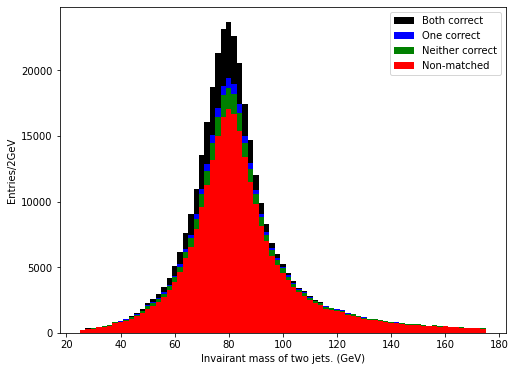

In [12]:
plt.figure(figsize=(8,6))
plt.hist(mjj_case_1+mjj_case_2+ mjj_case_3+mjj_case_4, bins=75, histtype="stepfilled", range=(25,175), label="Both correct", color='black', stacked=True)
plt.hist(mjj_case_4+mjj_case_3+mjj_case_2, bins=75, histtype="stepfilled", range=(25,175), label="One correct", color='blue', stacked=True)
plt.hist(mjj_case_4+mjj_case_3, bins=75, histtype="stepfilled", range=(25,175), label="Neither correct", color='green', stacked=True)
plt.hist(mjj_case_4, bins=75, histtype="stepfilled", range=(25,175), label='Non-matched', color='red', stacked=True)

plt.legend(loc="upper right")
plt.xlabel("Invairant mass of two jets. (GeV)")
plt.ylabel("Entries/2GeV")
plt.savefig("./demo/Pic/purity_inv_mass_mjj.png")

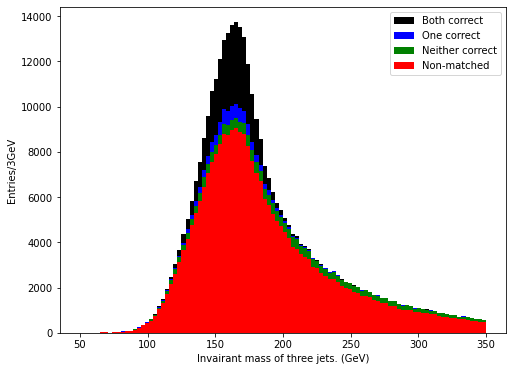

In [13]:
plt.figure(figsize=(8,6))
plt.hist(mjjj_case_1+mjjj_case_2+ mjjj_case_3+mjjj_case_4, bins=100, histtype="stepfilled", range=(50,350), label="Both correct", color='black', stacked=True)
plt.hist(mjjj_case_4+mjjj_case_3+mjjj_case_2, bins=100, histtype="stepfilled", range=(50,350), label="One correct", color='blue', stacked=True)
plt.hist(mjjj_case_4+mjjj_case_3, bins=100, histtype="stepfilled", range=(50,350), label="Neither correct", color='green', stacked=True)
plt.hist(mjjj_case_4, bins=100, histtype="stepfilled", range=(50,350), label='Non-matched', color='red', stacked=True)
plt.legend(loc="upper right")
plt.xlabel("Invairant mass of three jets. (GeV)")
plt.ylabel("Entries/3GeV")
plt.savefig("./demo/Pic/purity_inv_mass_mjjj.png")

In [14]:
chi2_value_case1 = []
chi2_value_case2 = []
chi2_value_case3 = []
chi2_value_case4 = []

for i in tqdm.trange(len(chi2_value)):
    if case[i] == 1:
        chi2_value_case1.append(chi2_value[i])
    elif case[i] == 2:
        chi2_value_case2.append(chi2_value[i])
    elif case[i] == 3:
        chi2_value_case3.append(chi2_value[i])
    else :
        chi2_value_case4.append(chi2_value[i])

100%|██████████| 182014/182014 [00:00<00:00, 671739.66it/s]


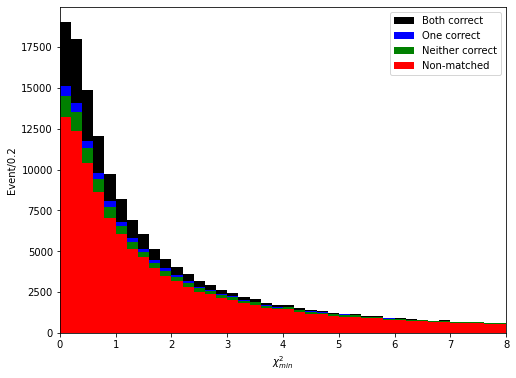

In [15]:
plt.figure(figsize=(8,6))
plt.hist(chi2_value_case4+chi2_value_case3+ chi2_value_case2+chi2_value_case1, bins=40, histtype="stepfilled", range=(0,8), label="Both correct", color='black', stacked=True)
plt.hist(chi2_value_case4+chi2_value_case3+chi2_value_case2, bins=40, histtype="stepfilled", range=(0,8), label="One correct", color='blue', stacked=True)
plt.hist(chi2_value_case4+chi2_value_case3, bins=40, histtype="stepfilled", range=(0,8), label="Neither correct", color='green', stacked=True)
plt.hist(chi2_value_case4, bins=40, histtype="stepfilled", range=(0,8), label='Non-matched', color='red', stacked=True)
plt.legend(loc="upper right")
plt.xlabel(r"$\chi^{2}_{min}$")
plt.ylabel("Event/0.2")
plt.xlim(0,8)
plt.savefig("./demo/Pic/purity_chi2_dist.png")

In [16]:
with h5py.File('Output_purity.h5','w') as p:
    length = len(pair_info_del)
    dt = h5py.vlen_dtype(np.dtype('float16'))
    Delta_R_result = p.create_dataset("Delta_R_result", (length,6), dtype = dt)
    Chi2_result = p.create_dataset("Chi2_result", (length,6), dtype= dt)
    
    for i in tqdm.trange(length):
        Delta_R_result[i] = pair_info_del[i]
        Chi2_result[i] = pair_info_chi2[i]

100%|██████████| 182014/182014 [01:57<00:00, 1548.63it/s]
